# Produção Energética e Sustentabilidade

### Descrição

A energia solar é uma das principais fontes de energias renováveis, desempenhando não só um papel fundamental na transição para fontes de energia limpa e renovável, mas também na promoção da sustentabilidade ambiental. Nesse contexto, além de ser crucial otimizar o uso da energia solar, a relação entre o gasto e a produção energética é essencial para permitir um planeamento eficaz do consumo energético e a integração harmoniosa de sistemas de energia solar em redes elétricas existentes.

Nesse sentido, a 6ª Edição da Competição ML @SBS/DAA consiste no desenvolvimento de modelos de Machine Learning capazes de prever, com precisão, a quantidade de energia elétrica, em kWh, gerada por painéis solares e injectada na rede eléctrica existente a cada hora do dia com base numa ampla gama de atributos, que vão desde dados meteorológicos e informações geográficas, ao histórico de gasto e produção energética.

Este é, portanto, um problema de previsão de energia com impacto significativo na eficiência energética, mas também na redução das emissões de gases com efeito estufa e na promoção da sustentabilidade. Com isso em consideração, foi colecionado um dataset que contém diversos dados referentes à produção energética de determinados painéis solares na cidade de Braga (o dataset cobre um período que vai desde setembro de 2021 até abril de 2023).

### Objetivo

O objetivo de cada grupo de trabalho passa por desenvolver o melhor modelo possível capaz de prever a quantidade de energia, em kWh, produzida por painéis solares e injectada, em redes elétricas existentes, a cada hora do dia.

O dataset utilizado nesta competição contém um conjunto de features sendo de destacar a feature Injeção na rede (kWh) . Esta feature indica, numa escala qualitativa (None, Low, Medium, High e Very_High), a quantidade de energia que se injectou na rede elétrica num determinado ponto temporal (i.e., numa determinada hora de um determinado dia). Se o valor desta feature for None, significa que não foi injectada nenhuma energia na rede (ou porque nada foi obtido dos painéis solares, ou porque toda a energia produzida pelos painéis foi consumida localmente). Um valor de Very_High implica a existência de uma quantidade muito alta de energia injectada na rede eléctrica naquele ponto temporal.

Para treino e tuning dos modelos de Machine Learning ser-vos-ão disponibilizados dois datasets com dados energéticos e dois datasets com dados meteorológicos. Tantos os datasets energéticos como os meteorológicos estão divididos por data, i.e., um dos datasets cobre o período de 2021 enquanto que o outro cobre todo o ano de 2022. Os grupos de trabalho poderão adicionar aos datasets qualquer atributo que achem relevante.

Para obtenção de scores na competição, os grupos de trabalho deverão prever, para cada registo do dataset de teste ("energia_202301-202304.csv"), a quantidade de energia que se injectou na rede elétrica num determinado ponto temporal, utilizando a escala None, Low, Medium, High e Very_High.

### Os dados

São disponibilizados dois tipos de datasets, i.e., um tipo com dados energéticos e outro tipo com dados meteorológicos. Além disso, cada tipo de dataset está dividido por data, i.e., um dos datasets cobre o período de 2021 enquanto que o outro cobre todo o ano de 2022. Em resumo, são disponibilizados quatro datasets para treino e tuning dos modelos de Machine Learning

Features dos Datasets de Energia

- **Data** - o timestamp associado ao registo, ao dia;
- **Hora** - a hora associada ao registo;
- **Normal (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio);
- **Horário Económico (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio);
- **Autoconsumo (kWh)** - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares;
- **Injeção na rede (kWh)** - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

Features dos Datasets Meteorológicos

- **dt** - o timestamp associado ao registo;
- **dt_iso** - a data associada ao registo, ao segundo;
- **city_name** - o local em causa;
- **temp** - temperatura em ºC;
- **feels_like** - sensação térmica em ºC;
- **temp_min** - temperatura mínima sentida em ºC;
- **temp_max** - temperatura máxima sentida em ºC;
- **pressure** - pressão atmosférica sentida em atm;
- **sea_level** - pressão atmosférica sentida ao nível do mar em atm;
- **grnd_level** - pressão atmosférica sentida à altitude local em atm;
- **humidity** - humidade em percentagem;
- **wind_speed** - velocidade do vento em metros por segundo;
- **rain_1h** - valor médio de precipitação;
- **clouds_all** - nível de nebulosidade em percentagem;
- **weather_description** - avaliação qualitativa do estado do tempo.


## Importar Bibliotecas

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV, train_test_split  
import time 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from scikeras.wrappers import KerasClassifier
import xgboost as xgb
#from imblearn.under_sampling import RandomUnderSampler

# Outras bibliotecas a importar mais tarde
%matplotlib inline

## Carregar os Datasets

In [518]:
energia2021 = pd.read_csv('datasets/energia_202109-202112.csv', encoding = "ISO-8859-1")
energia2022 = pd.read_csv('datasets/energia_202201-202212.csv', encoding = "ISO-8859-1")
energia2023 = pd.read_csv('datasets/energia_202301-202304.csv', encoding = "ISO-8859-1")

meteo2021 = pd.read_csv('datasets/meteo_202109-202112.csv')
meteo2022 = pd.read_csv('datasets/meteo_202201-202212.csv')
meteo2023 = pd.read_csv('datasets/meteo_202301-202304.csv')

Verificar as colunas de cada dataset

In [519]:
print(energia2021.columns)
print(energia2022.columns)
print(energia2023.columns)
print(meteo2021.columns)
print(meteo2022.columns)
print(meteo2023.columns)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidi

In [520]:
print(energia2021.info())
print()
print(energia2022.info())
print()
print(energia2023.info())
print()
print(meteo2021.info())
print()
print(meteo2022.info())
print()
print(meteo2023.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Eco

Conclusão: as colunas são as mesmas

Próximo passo: Concatenar os datasets

In [521]:
frames_energia = [energia2021, energia2022]
frames_meteo = [meteo2021, meteo2022]

energia = pd.concat(frames_energia)
meteo = pd.concat(frames_meteo)

meteo.rename(columns={'dt': 'Timestamp','dt_iso':'Data', 'city_name':'Nome da Cidade', 'temp':'Temperatura (ºC)', 'feels_like': 'Sensação Térmica (ºC)', 'temp_min': 'Temperatura Mínima (ºC)', 'temp_max': 'Temperatura Máxima (ºC)', 'pressure': 'Pressão Atmosférica (atm)', 'sea_level': 'Pressão atmosférica no nível do mar (atm)', 'grnd_level': 'Pressão atmosférica na altitude local (atm)', 'humidity': 'Humidade (%)', 'wind_speed': 'Velocidade do vento (m/s)', 'rain_1h': 'Valor médio de precipitação', 'clouds_all': 'Nível de nebulosidade (%)', 'weather_description': 'Avaliação qualitativa do estado do tempo'}, inplace=True)


Verificar o tamanho dos dados depois da concatenação, a presença de missing values e os tipos de dados

In [522]:
print(energia.info())
print()
print(meteo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 602.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 11688 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Timestamp                                    11688 non-null  int64  
 1   Data                                         11688 non-null  objec

In [523]:
meteo

,Timestamp,Data,Nome da Cidade,Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Pressão atmosférica no nível do mar (atm),Pressão atmosférica na altitude local (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1672513200,2022-12-31 19:00:00 +0000 UTC,local,15.70,15.57,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain
8756,1672516800,2022-12-31 20:00:00 +0000 UTC,local,15.55,15.43,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
8757,1672520400,2022-12-31 21:00:00 +0000 UTC,local,13.45,13.28,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
8758,1672524000,2022-12-31 22:00:00 +0000 UTC,local,12.93,12.73,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain


In [524]:
energia

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29,0,0.000,0.000,0.0,NaN
1,2021-09-29,1,0.000,0.000,0.0,NaN
2,2021-09-29,2,0.000,0.000,0.0,NaN
3,2021-09-29,3,0.000,0.000,0.0,NaN
4,2021-09-29,4,0.000,0.000,0.0,NaN
...,...,...,...,...,...,...
8755,2022-12-31,19,1.693,0.000,0.0,NaN
8756,2022-12-31,20,1.327,0.000,0.0,NaN
8757,2022-12-31,21,0.757,0.000,0.0,NaN
8758,2022-12-31,22,0.000,0.675,0.0,NaN


Juntar num único dataset. Precisamos de agrupar os dados metereológicos às medições de energia correspondentes.
Agrupar por Data e Hora.

In [525]:
meteo['Data'] = pd.to_datetime(meteo['Data'], format='%Y-%m-%d %H:%M:%S +0000 UTC', errors='coerce') # 2021-09-01 00:00:00 +0000 UTC
meteo.head()

,Timestamp,Data,Nome da Cidade,Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Pressão atmosférica no nível do mar (atm),Pressão atmosférica na altitude local (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo
0,1630454400,2021-09-01 00:00:00,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [526]:

energia['Data'] = pd.to_datetime(energia.apply(lambda row: f"{row['Data']} {row['Hora']}", axis=1), format='%Y-%m-%d %H', errors='coerce') 
energia.drop('Hora', axis=1, inplace=True)
energia.head()

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29 00:00:00,0.0,0.0,0.0,NaN
1,2021-09-29 01:00:00,0.0,0.0,0.0,NaN
2,2021-09-29 02:00:00,0.0,0.0,0.0,NaN
3,2021-09-29 03:00:00,0.0,0.0,0.0,NaN
4,2021-09-29 04:00:00,0.0,0.0,0.0,NaN


### Merge aos dois datasets

In [527]:
data = pd.merge(energia, meteo, how = 'left', on = 'Data')
data

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Timestamp,Nome da Cidade,Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Pressão atmosférica no nível do mar (atm),Pressão atmosférica na altitude local (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo
0,2021-09-29 00:00:00,0.000,0.000,0.0,NaN,1632873600,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29 01:00:00,0.000,0.000,0.0,NaN,1632877200,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29 02:00:00,0.000,0.000,0.0,NaN,1632880800,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29 03:00:00,0.000,0.000,0.0,NaN,1632884400,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29 04:00:00,0.000,0.000,0.0,NaN,1632888000,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31 19:00:00,1.693,0.000,0.0,NaN,1672513200,local,15.70,15.57,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain
11012,2022-12-31 20:00:00,1.327,0.000,0.0,NaN,1672516800,local,15.55,15.43,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
11013,2022-12-31 21:00:00,0.757,0.000,0.0,NaN,1672520400,local,13.45,13.28,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
11014,2022-12-31 22:00:00,0.000,0.675,0.0,NaN,1672524000,local,12.93,12.73,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain


In [528]:
data.duplicated().sum()

0

### Verificação da coluna Timestamp e Nome da Cidade

In [529]:
data['Timestamp'].value_counts()

Timestamp
1632873600    1
1659322800    1
1659294000    1
1659297600    1
1659301200    1
             ..
1646096400    1
1646100000    1
1646103600    1
1646107200    1
1672527600    1
Name: count, Length: 11016, dtype: int64

In [530]:
data['Nome da Cidade'].value_counts()

Nome da Cidade
local    11016
Name: count, dtype: int64

In [531]:
data.drop(['Timestamp', 'Nome da Cidade'], axis=1, inplace=True)

In [532]:
data

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Pressão atmosférica no nível do mar (atm),Pressão atmosférica na altitude local (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo
0,2021-09-29 00:00:00,0.000,0.000,0.0,NaN,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29 01:00:00,0.000,0.000,0.0,NaN,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29 02:00:00,0.000,0.000,0.0,NaN,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29 03:00:00,0.000,0.000,0.0,NaN,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29 04:00:00,0.000,0.000,0.0,NaN,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31 19:00:00,1.693,0.000,0.0,NaN,15.70,15.57,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain
11012,2022-12-31 20:00:00,1.327,0.000,0.0,NaN,15.55,15.43,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
11013,2022-12-31 21:00:00,0.757,0.000,0.0,NaN,13.45,13.28,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
11014,2022-12-31 22:00:00,0.000,0.675,0.0,NaN,12.93,12.73,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain


Divisão da coluna Data

In [533]:
data['Year'] = data['Data'].dt.year
data['Month'] = data['Data'].dt.month
data['Day'] = data['Data'].dt.day
data['Hour'] = data['Data'].dt.hour
data['Minute'] = data['Data'].dt.minute
data['Seconds'] = data['Data'].dt.second

data.drop(['Data'], axis=1, inplace=True)

In [534]:
data

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Pressão atmosférica no nível do mar (atm),...,Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo,Year,Month,Day,Hour,Minute,Seconds
0,0.000,0.000,0.0,NaN,13.97,13.54,11.45,14.04,1027,NaN,...,1.96,NaN,87,overcast clouds,2021,9,29,0,0,0
1,0.000,0.000,0.0,NaN,13.48,13.02,13.43,13.90,1028,NaN,...,1.83,NaN,91,overcast clouds,2021,9,29,1,0,0
2,0.000,0.000,0.0,NaN,12.93,12.47,12.72,13.43,1027,NaN,...,1.96,NaN,93,overcast clouds,2021,9,29,2,0,0
3,0.000,0.000,0.0,NaN,12.61,12.15,10.34,12.93,1027,NaN,...,1.85,NaN,95,overcast clouds,2021,9,29,3,0,0
4,0.000,0.000,0.0,NaN,12.61,12.17,9.79,12.93,1027,NaN,...,1.83,NaN,93,overcast clouds,2021,9,29,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1.693,0.000,0.0,NaN,15.70,15.57,15.57,15.72,1018,NaN,...,5.56,3.58,100,moderate rain,2022,12,31,19,0,0
11012,1.327,0.000,0.0,NaN,15.55,15.43,12.72,15.70,1018,NaN,...,4.47,4.20,100,heavy intensity rain,2022,12,31,20,0,0
11013,0.757,0.000,0.0,NaN,13.45,13.28,12.23,13.99,1019,NaN,...,3.29,4.23,100,heavy intensity rain,2022,12,31,21,0,0
11014,0.000,0.675,0.0,NaN,12.93,12.73,12.23,13.43,1019,NaN,...,1.49,3.90,100,moderate rain,2022,12,31,22,0,0


In [535]:
print(data['Minute'].value_counts())
print(data['Seconds'].value_counts())

Minute
0    11016
Name: count, dtype: int64
Seconds
0    11016
Name: count, dtype: int64


In [536]:
data.drop(['Minute', 'Seconds'], axis=1, inplace=True)

In [537]:
data

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Pressão atmosférica no nível do mar (atm),Pressão atmosférica na altitude local (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo,Year,Month,Day,Hour
0,0.000,0.000,0.0,NaN,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds,2021,9,29,0
1,0.000,0.000,0.0,NaN,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds,2021,9,29,1
2,0.000,0.000,0.0,NaN,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds,2021,9,29,2
3,0.000,0.000,0.0,NaN,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds,2021,9,29,3
4,0.000,0.000,0.0,NaN,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds,2021,9,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1.693,0.000,0.0,NaN,15.70,15.57,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain,2022,12,31,19
11012,1.327,0.000,0.0,NaN,15.55,15.43,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain,2022,12,31,20
11013,0.757,0.000,0.0,NaN,13.45,13.28,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain,2022,12,31,21
11014,0.000,0.675,0.0,NaN,12.93,12.73,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain,2022,12,31,22


### Preparação e Transformação dos Dados

Verificar missing values

<Axes: >

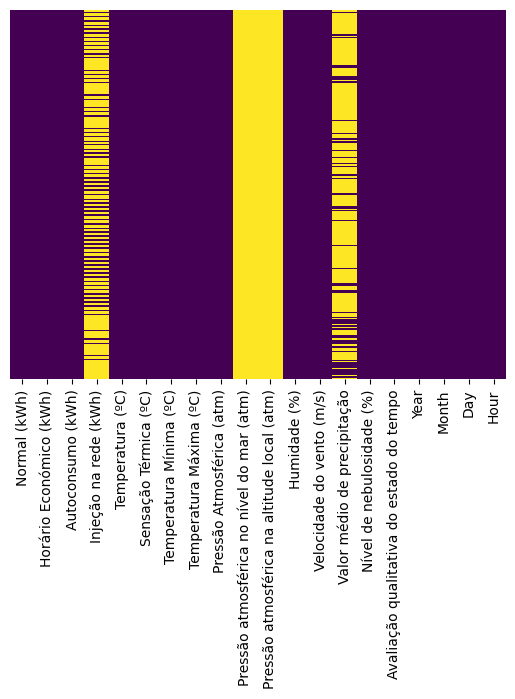

In [538]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Retirar colunas 'Pressão atmosférica no nível do mar(atm)' e 'Pressão atmosférica na altitude local(atm)'

<Axes: >

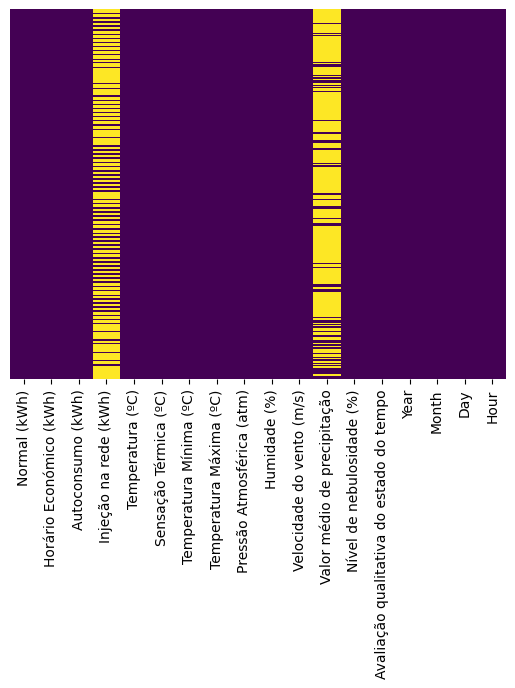

In [539]:
data.drop(['Pressão atmosférica no nível do mar (atm)', 'Pressão atmosférica na altitude local (atm)'], axis=1, inplace=True)
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Tratamento da coluna 'Valor médio de precipitação'

In [540]:
data['Valor médio de precipitação'].value_counts()

Valor médio de precipitação
0.12    69
0.16    57
0.15    54
0.14    54
0.11    51
        ..
6.36     1
3.54     1
3.89     1
3.65     1
4.07     1
Name: count, Length: 367, dtype: int64

<Axes: >

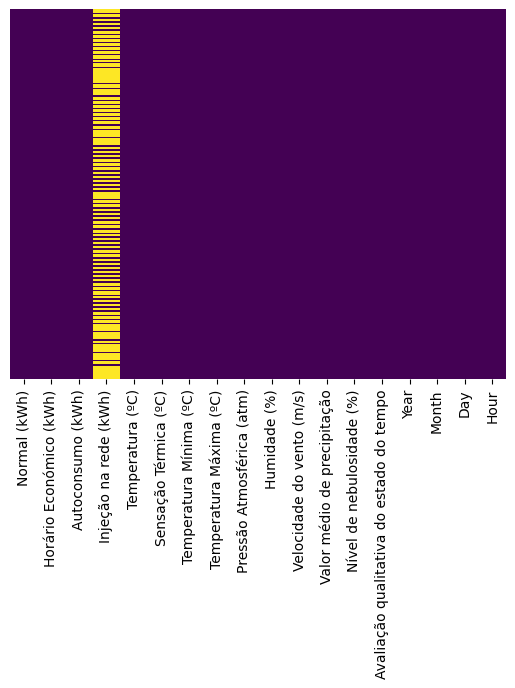

In [541]:
data['Valor médio de precipitação'] = data['Valor médio de precipitação'].fillna(0)
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Tratamento da coluna 'Injeção na rede(kWh)'

In [542]:
data['Injeção na rede (kWh)'].value_counts()

Injeção na rede (kWh)
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64

<Axes: >

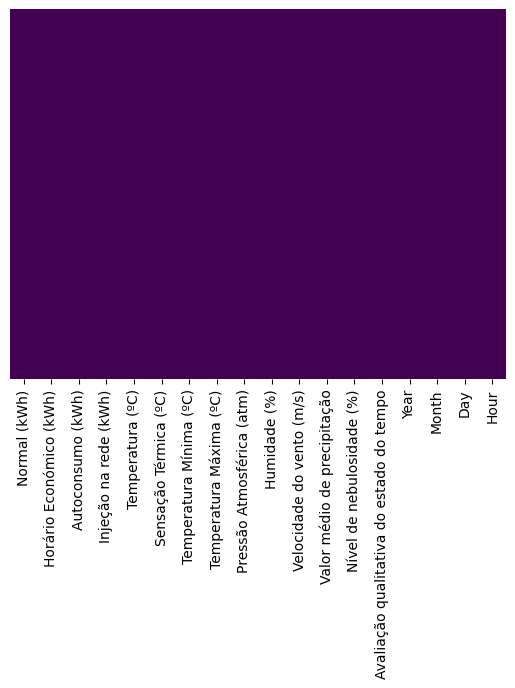

In [543]:
data['Injeção na rede (kWh)'] = data['Injeção na rede (kWh)'].fillna('None')
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [544]:
data

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo,Year,Month,Day,Hour
0,0.000,0.000,0.0,None,13.97,13.54,11.45,14.04,1027,81,1.96,0.00,87,overcast clouds,2021,9,29,0
1,0.000,0.000,0.0,None,13.48,13.02,13.43,13.90,1028,82,1.83,0.00,91,overcast clouds,2021,9,29,1
2,0.000,0.000,0.0,None,12.93,12.47,12.72,13.43,1027,84,1.96,0.00,93,overcast clouds,2021,9,29,2
3,0.000,0.000,0.0,None,12.61,12.15,10.34,12.93,1027,85,1.85,0.00,95,overcast clouds,2021,9,29,3
4,0.000,0.000,0.0,None,12.61,12.17,9.79,12.93,1027,86,1.83,0.00,93,overcast clouds,2021,9,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,moderate rain,2022,12,31,19
11012,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,heavy intensity rain,2022,12,31,20
11013,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,heavy intensity rain,2022,12,31,21
11014,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,moderate rain,2022,12,31,22


### Analisar os dados

Analisar os valores para a coluna temp

In [545]:
data['Temperatura (ºC)'].value_counts()

Temperatura (ºC)
14.59    61
15.70    55
16.82    50
12.92    46
16.81    44
         ..
4.27      1
9.72      1
8.01      1
28.55     1
15.43     1
Name: count, Length: 2382, dtype: int64

Histograma 

<Axes: >

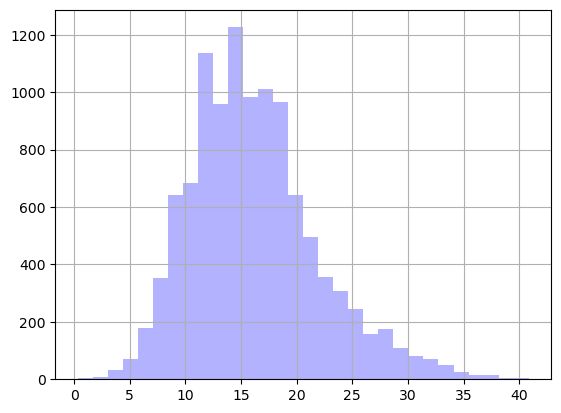

In [546]:
data['Temperatura (ºC)'].hist(bins=30, color='blue', alpha=0.3)

In [547]:
data['Avaliação qualitativa do estado do tempo'].value_counts()

Avaliação qualitativa do estado do tempo
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

In [548]:
by_temp = data['Temperatura (ºC)'].groupby(data['Avaliação qualitativa do estado do tempo'])
print(by_temp.count())
print()
print(by_temp.mean())

Avaliação qualitativa do estado do tempo
broken clouds           1413
few clouds               731
heavy intensity rain      60
light rain              1662
moderate rain            562
overcast clouds         2430
scattered clouds        1148
sky is clear            3010
Name: Temperatura (ºC), dtype: int64

Avaliação qualitativa do estado do tempo
broken clouds           16.437657
few clouds              16.522763
heavy intensity rain    16.244333
light rain              14.994771
moderate rain           15.027740
overcast clouds         15.416708
scattered clouds        16.949408
sky is clear            17.177807
Name: Temperatura (ºC), dtype: float64


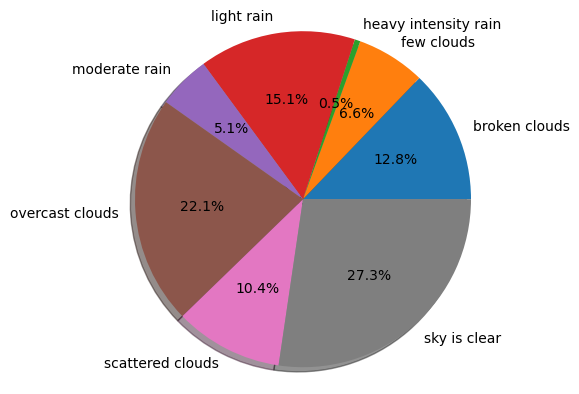

In [549]:
labels = data['Avaliação qualitativa do estado do tempo'].astype('category').cat.categories.tolist()
counts = data['Avaliação qualitativa do estado do tempo'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Histograma referente à variável 'Injeção na Rede'

<Axes: >

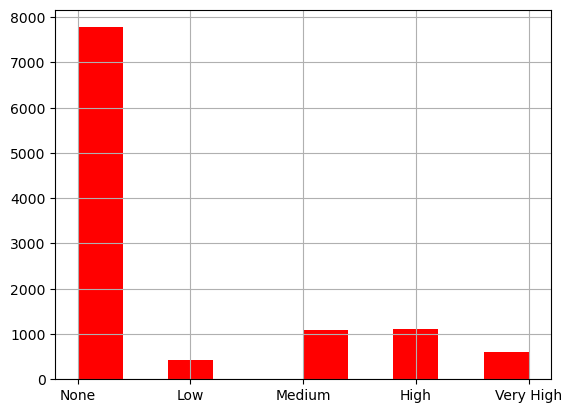

In [550]:
data['Injeção na rede (kWh)'].hist(color='red')

Método de Pearson

<Axes: >

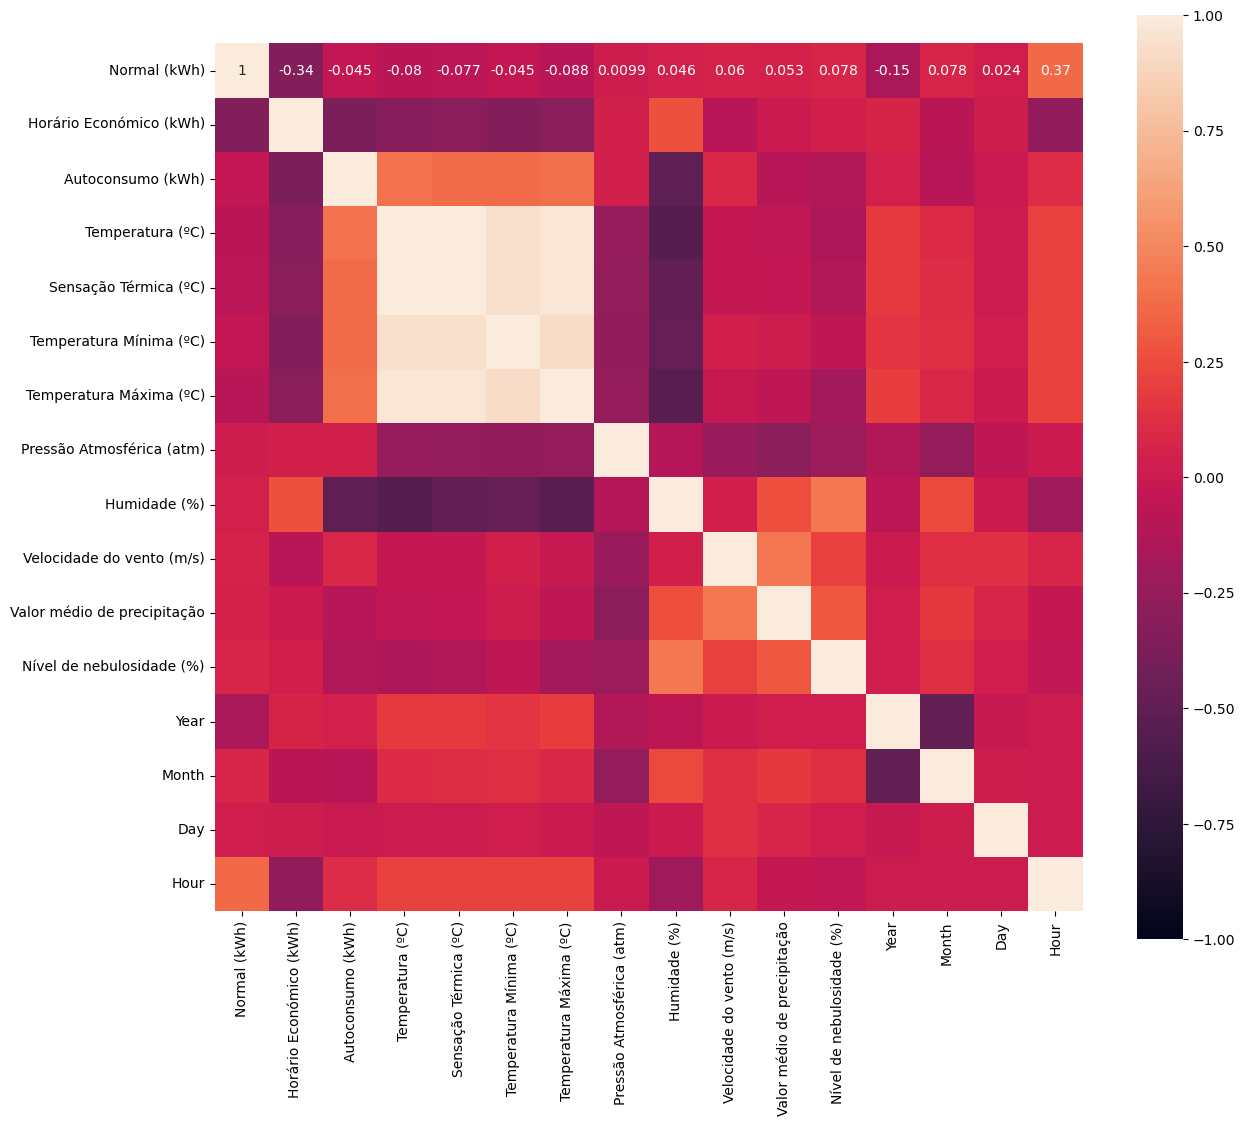

In [551]:
# Pearson Method
corr_matrix = data.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Método de Spearman

<Axes: >

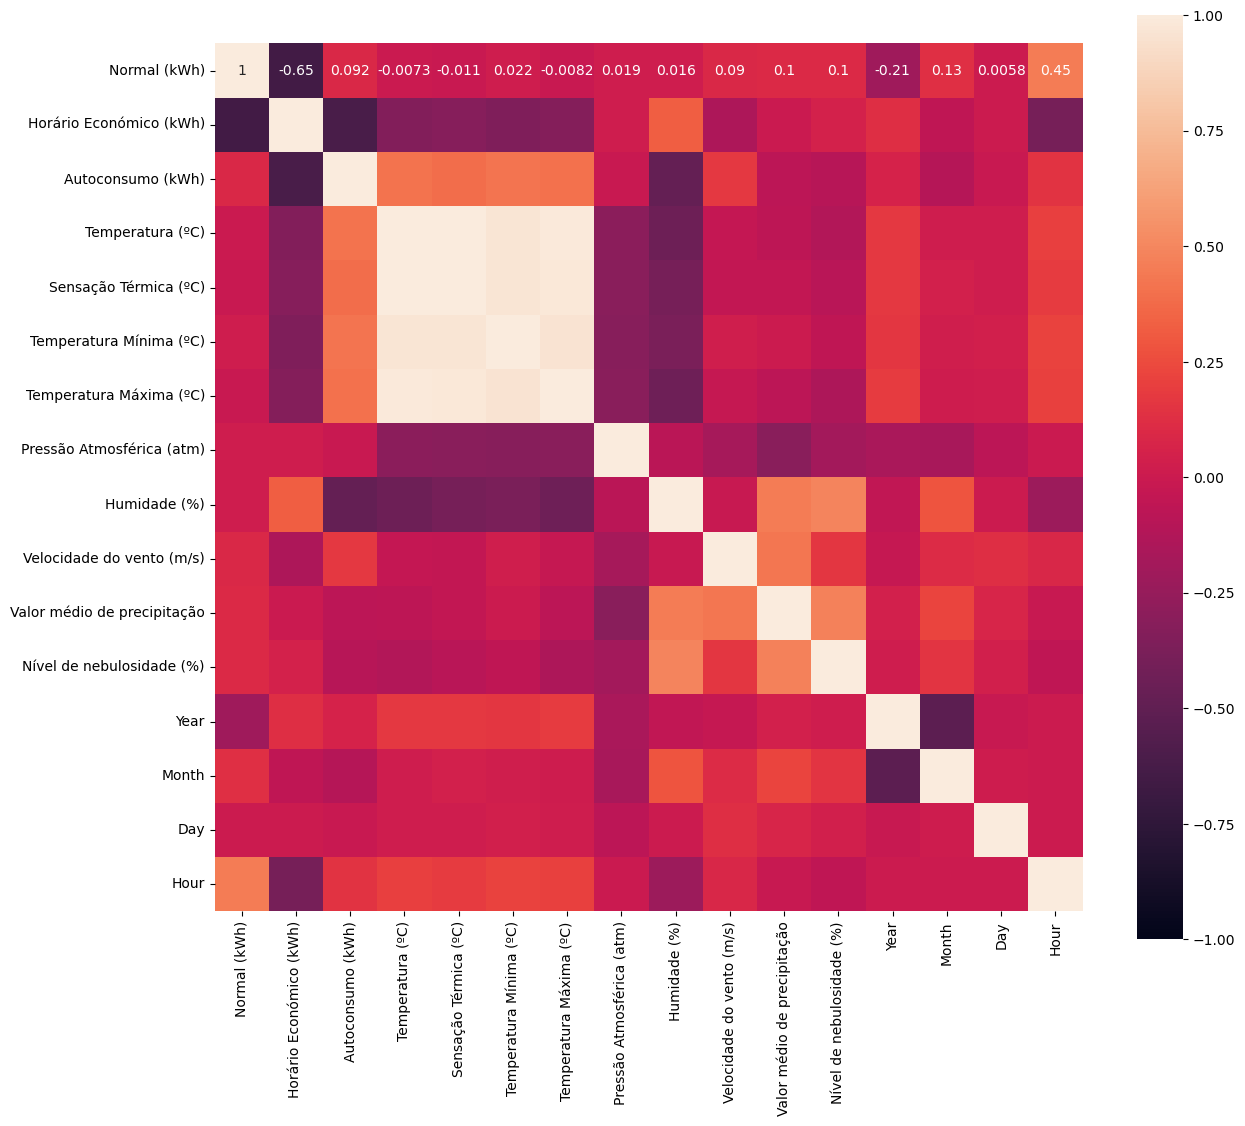

In [552]:
# Spearman method
corr_matrix = data.corr(method='spearman', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Método de Kendall

<Axes: >

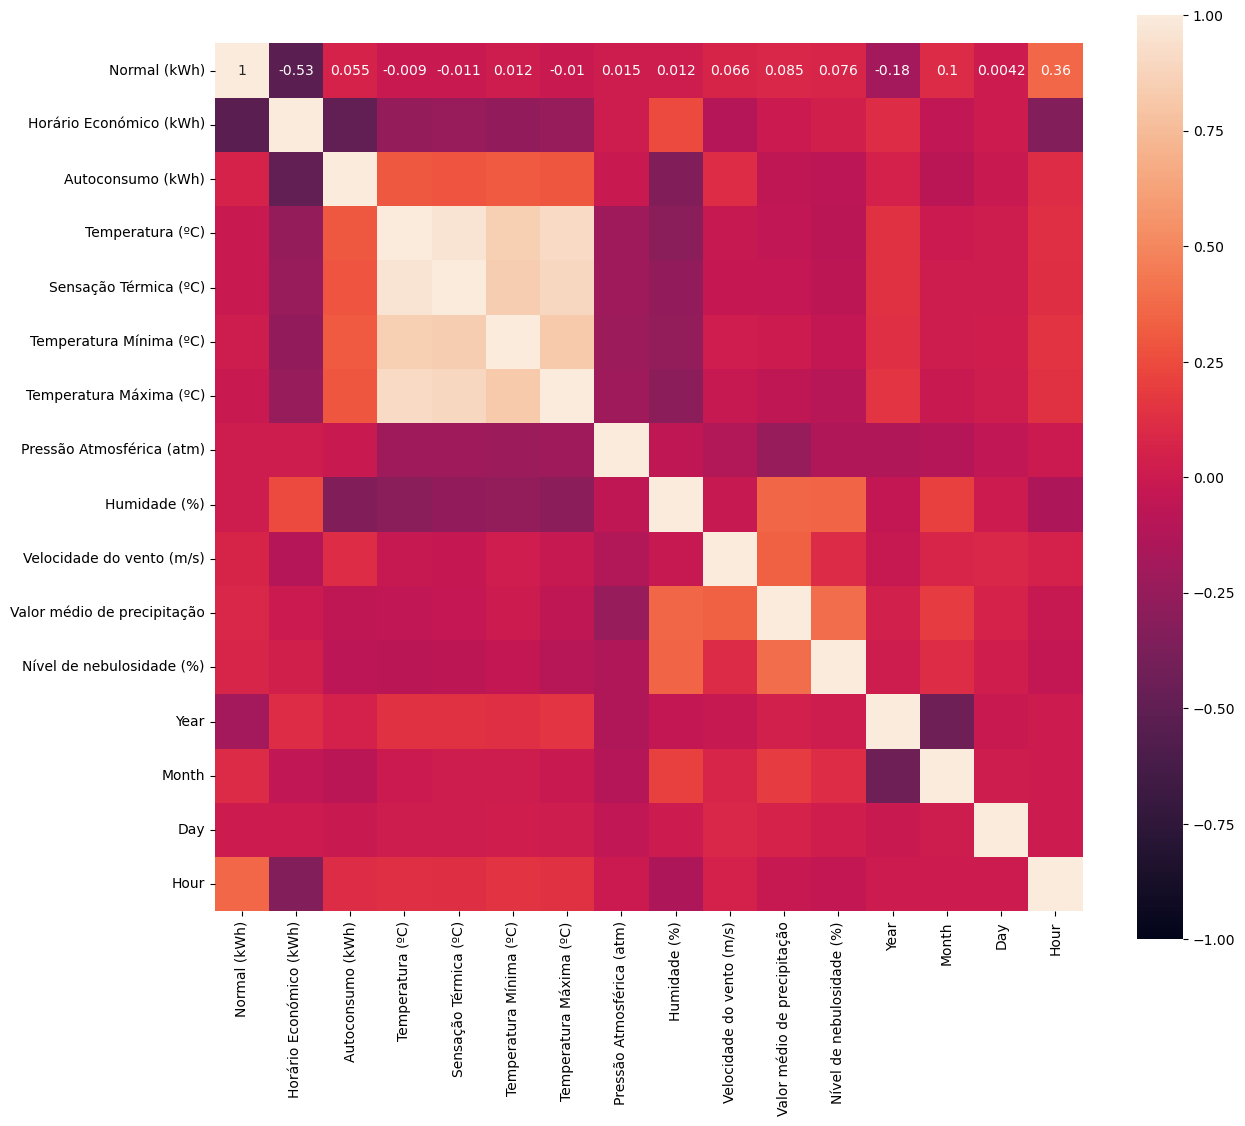

In [553]:
# Kendall method
corr_matrix = data.corr(method='kendall', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

## Outliers

In [554]:
def remove_outliers(df, column_name, threshold=1.5):
    """
    Remove outliers from a DataFrame based on a specified column using IQR method.

    Args:
    - df: DataFrame containing the data
    - column_name: Name of the column to detect outliers
    - threshold: Threshold value to determine outliers based on IQR (default=1.5)

    Returns:
    - DataFrame without outliers in the specified column
    """
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

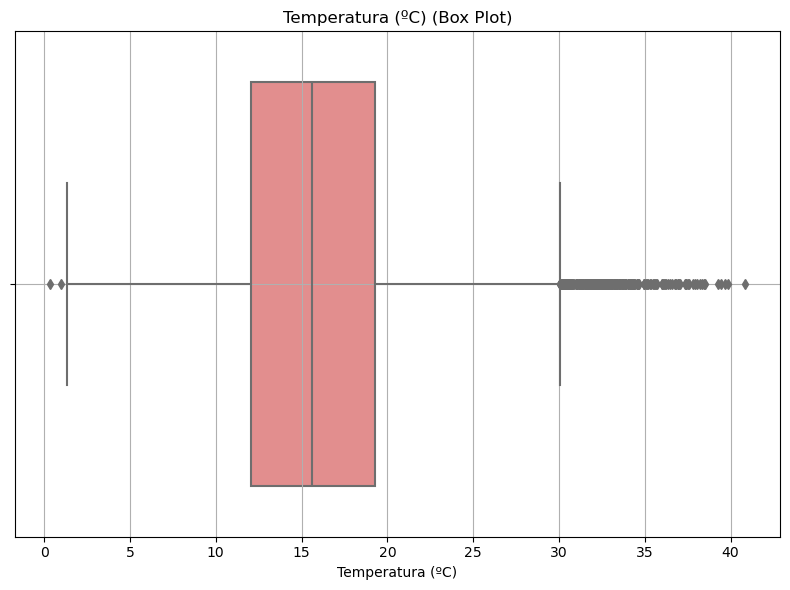

In [555]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Temperatura (ºC)'], color='lightcoral')
    
plt.title('Temperatura (ºC) (Box Plot)')
plt.xlabel('Temperatura (ºC)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [556]:
# Remove Temp outliers
#data = remove_outliers(data, 'Temperatura (ºC)', 1.5)

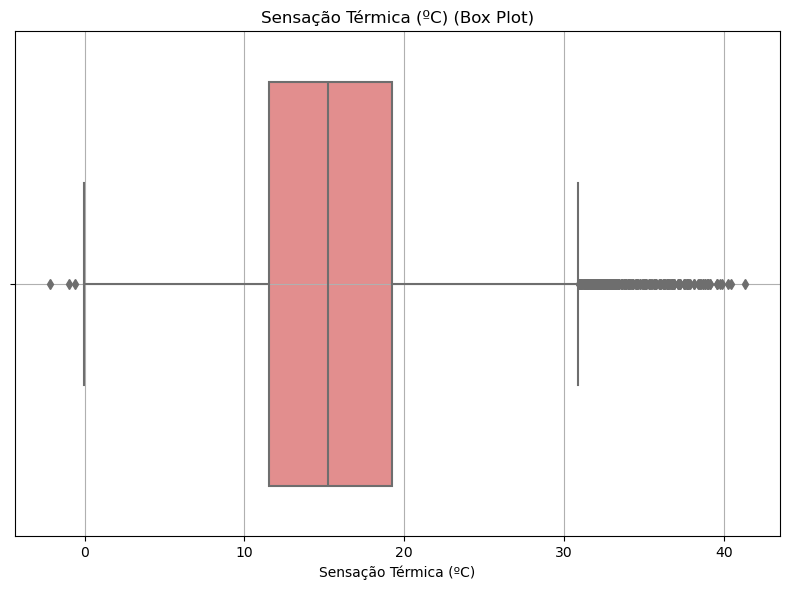

In [557]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Sensação Térmica (ºC)'], color='lightcoral')
    
plt.title('Sensação Térmica (ºC) (Box Plot)')
plt.xlabel('Sensação Térmica (ºC)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [558]:
# Remove sensação térmica outliers
data = remove_outliers(data, 'Sensação Térmica (ºC)', 1.5)

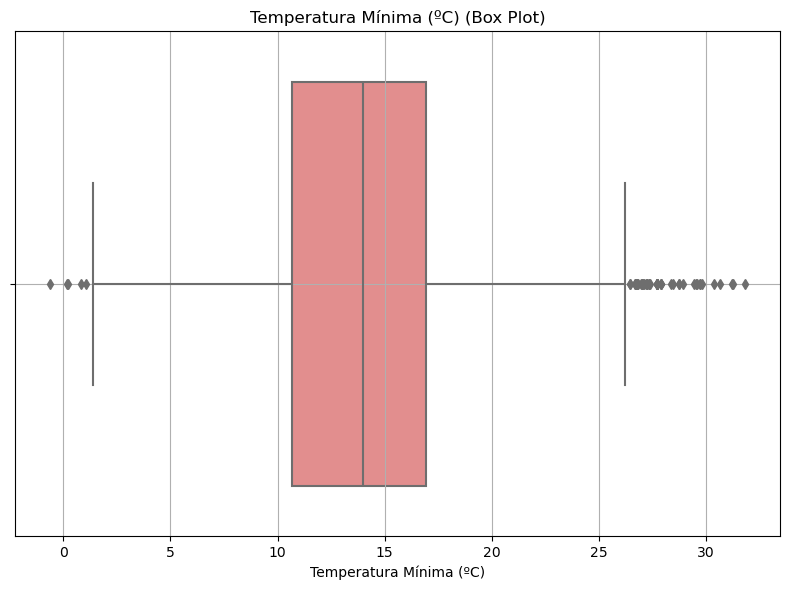

In [559]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Temperatura Mínima (ºC)'], color='lightcoral')
    
plt.title('Temperatura Mínima (ºC) (Box Plot)')
plt.xlabel('Temperatura Mínima (ºC)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [560]:
# Remove temp min outliers
# data = remove_outliers(data, 'Temperatura Mínima (ºC)', 1.5)

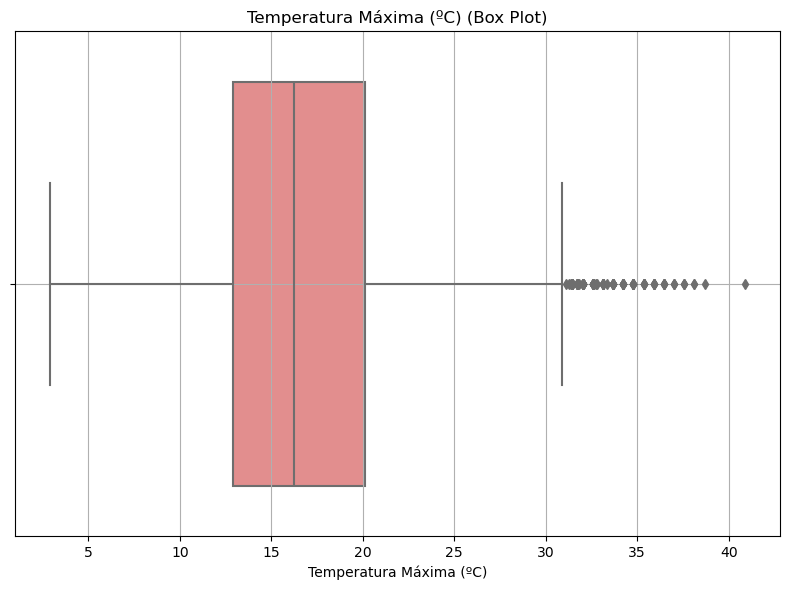

In [561]:


plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Temperatura Máxima (ºC)'], color='lightcoral')
    
plt.title('Temperatura Máxima (ºC) (Box Plot)')
plt.xlabel('Temperatura Máxima (ºC)')
    
plt.grid(True)
plt.tight_layout()
plt.show()



In [562]:
# Remove outliers temp max
# data = remove_outliers(data, 'Temperatura Máxima (ºC)', 1.5)

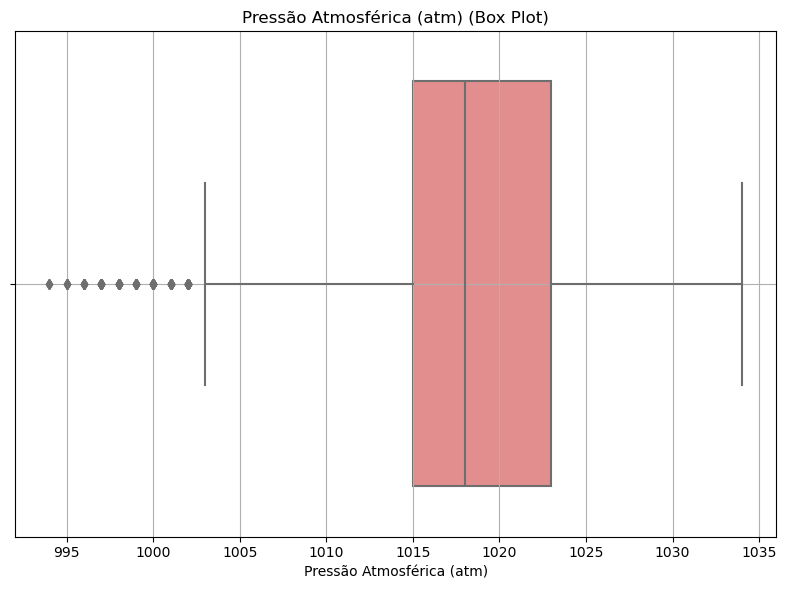

In [563]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Pressão Atmosférica (atm)'], color='lightcoral')
    
plt.title('Pressão Atmosférica (atm) (Box Plot)')
plt.xlabel('Pressão Atmosférica (atm)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [564]:
# Remove outliers pressão atmosférica
# data = remove_outliers(data, 'Pressão Atmosférica (atm)', 1.5)

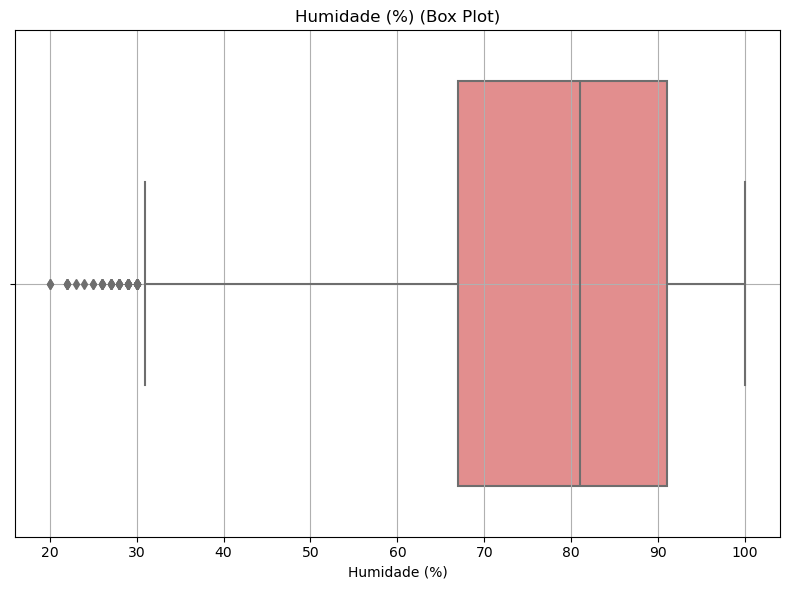

In [565]:


plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Humidade (%)'], color='lightcoral')
    
plt.title('Humidade (%) (Box Plot)')
plt.xlabel('Humidade (%)')
    
plt.grid(True)
plt.tight_layout()
plt.show()



In [566]:
# Remove outliers humidade
# data = remove_outliers(data, 'Humidade (%)', 1.5)

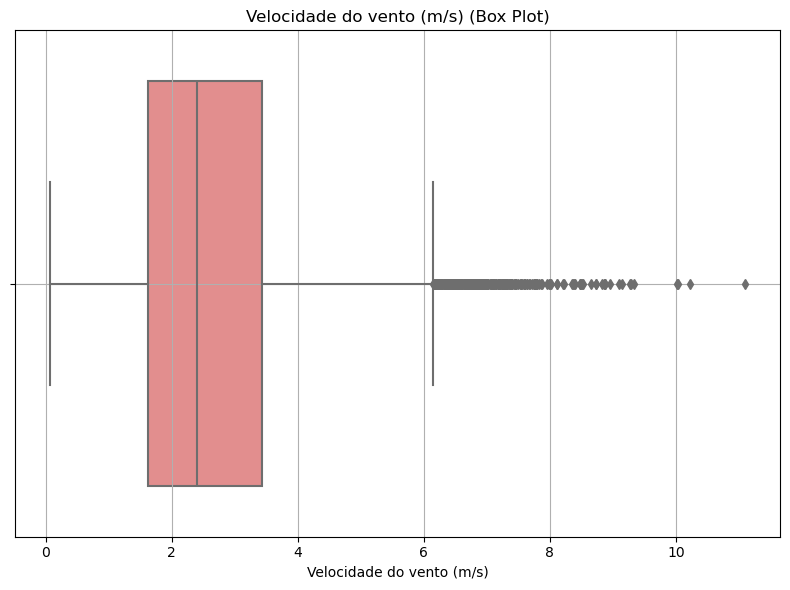

In [567]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Velocidade do vento (m/s)'], color='lightcoral')
    
plt.title('Velocidade do vento (m/s) (Box Plot)')
plt.xlabel('Velocidade do vento (m/s)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [568]:
# Remove outliers velocidade do vento
# data = remove_outliers(data, 'Velocidade do vento (m/s)', 1.5)

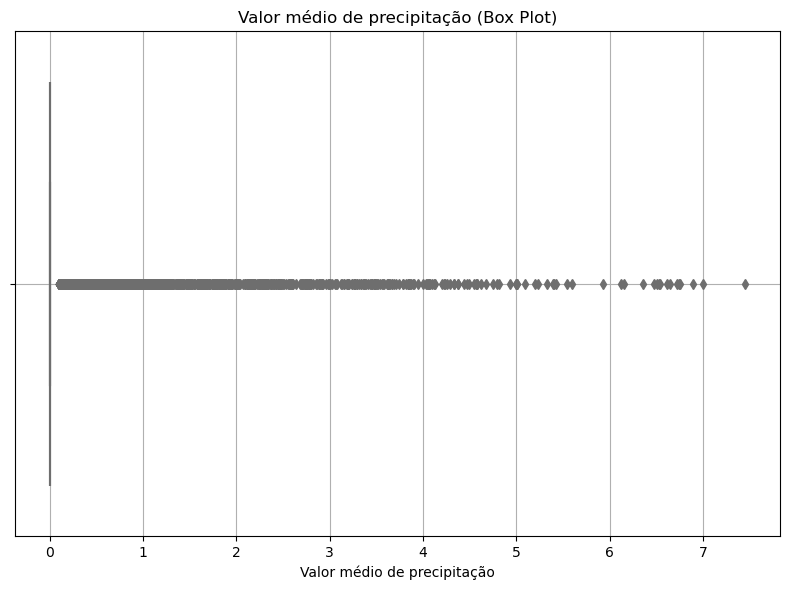

In [569]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Valor médio de precipitação'], color='lightcoral')
    
plt.title('Valor médio de precipitação (Box Plot)')
plt.xlabel('Valor médio de precipitação')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [570]:
# Remove outliers valor médio de precipitação
# data = remove_outliers(data, 'Valor médio de precipitação', 1.5)

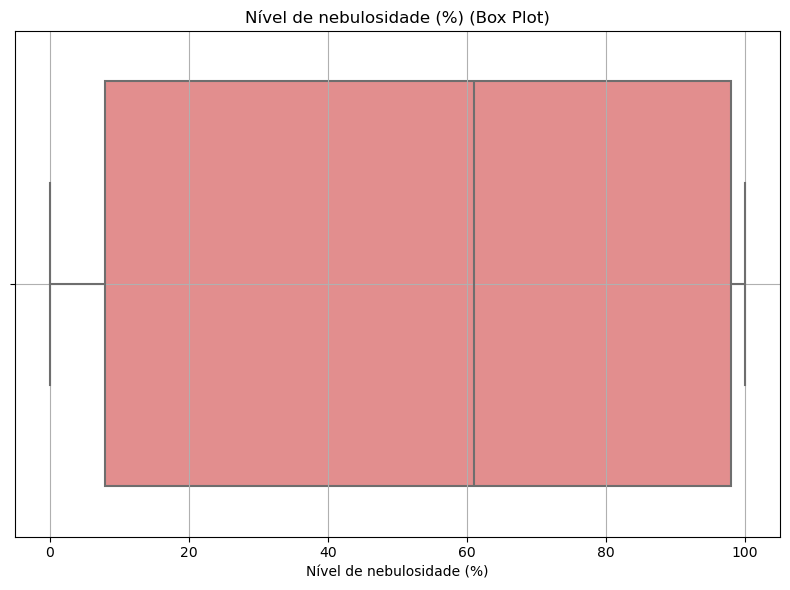

In [571]:


plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Nível de nebulosidade (%)'], color='lightcoral')
    
plt.title('Nível de nebulosidade (%) (Box Plot)')
plt.xlabel('Nível de nebulosidade (%)')
    
plt.grid(True)
plt.tight_layout()
plt.show()



In [572]:
# Remove outliers nível de nebulosidade
# data = remove_outliers(data, 'Nível de nebulosidade (%)', 1.5)

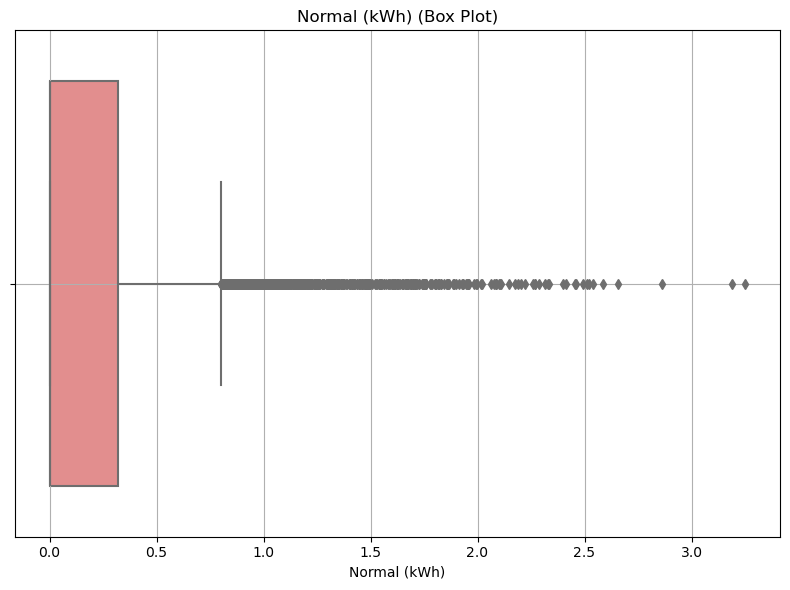

In [573]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Normal (kWh)'], color='lightcoral')
    
plt.title('Normal (kWh) (Box Plot)')
plt.xlabel('Normal (kWh)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [574]:
# Remove outliers normal
# data = remove_outliers(data, 'Normal (kWh)', 1.5)

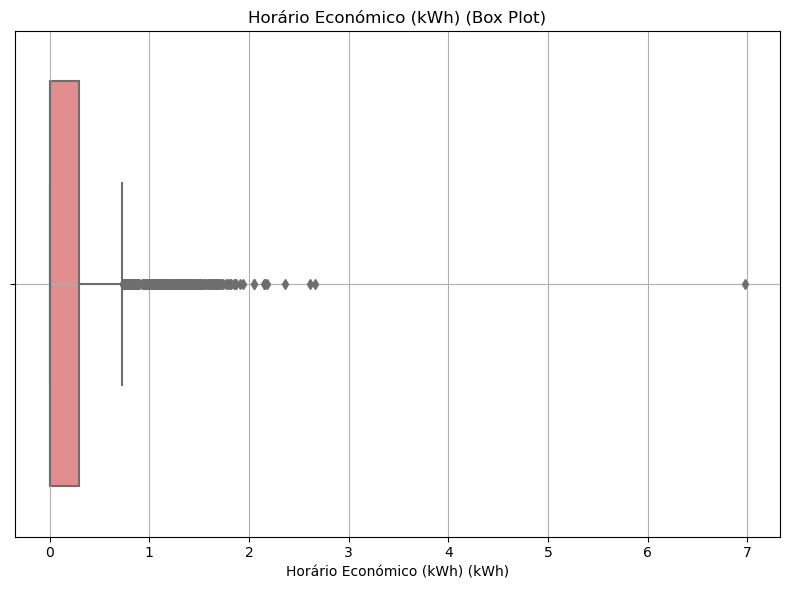

In [575]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Horário Económico (kWh)'], color='lightcoral')
    
plt.title('Horário Económico (kWh) (Box Plot)')
plt.xlabel('Horário Económico (kWh) (kWh)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [576]:
# Remove outliers horário económico
# data = remove_outliers(data, 'Horário Económico (kWh)', 1.5)

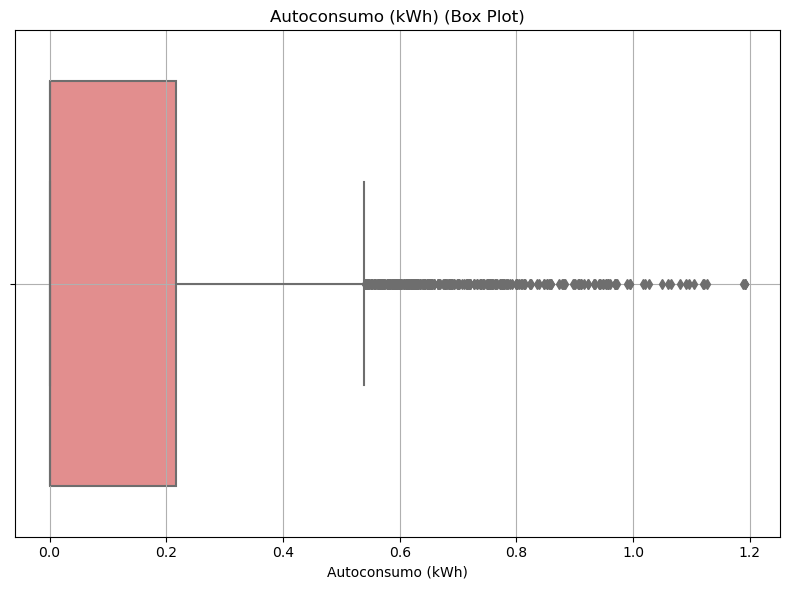

In [577]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Autoconsumo (kWh)'], color='lightcoral')
    
plt.title('Autoconsumo (kWh) (Box Plot)')
plt.xlabel('Autoconsumo (kWh)')
    
plt.grid(True)
plt.tight_layout()
plt.show()

In [578]:
# Remove outliers autoconsumo
# data = remove_outliers(data, 'Autoconsumo (kWh)', 1.5)

### Analisar os gráficos entre features

In [579]:
#sns.pairplot(data)

In [580]:
data['Avaliação qualitativa do estado do tempo'].value_counts()

Avaliação qualitativa do estado do tempo
sky is clear            2862
overcast clouds         2395
light rain              1661
broken clouds           1389
scattered clouds        1104
few clouds               714
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

In [581]:
mapeamento = {'heavy intensity rain': 0, 'moderate rain': 1, 'light rain': 2, 'overcast clouds': 3, 'broken clouds': 4, 'scattered clouds': 5, 'few clouds': 6, 'sky is clear': 7}

# Substituir os valores no DataFrame
data['Avaliação qualitativa do estado do tempo'] = data['Avaliação qualitativa do estado do tempo'].replace(mapeamento)

C:\Users\mgdsb\AppData\Local\Temp\ipykernel_3284\1815667631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Avaliação qualitativa do estado do tempo'] = data['Avaliação qualitativa do estado do tempo'].replace(mapeamento)


In [582]:
data

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo,Year,Month,Day,Hour
0,0.000,0.000,0.0,None,13.97,13.54,11.45,14.04,1027,81,1.96,0.00,87,3,2021,9,29,0
1,0.000,0.000,0.0,None,13.48,13.02,13.43,13.90,1028,82,1.83,0.00,91,3,2021,9,29,1
2,0.000,0.000,0.0,None,12.93,12.47,12.72,13.43,1027,84,1.96,0.00,93,3,2021,9,29,2
3,0.000,0.000,0.0,None,12.61,12.15,10.34,12.93,1027,85,1.85,0.00,95,3,2021,9,29,3
4,0.000,0.000,0.0,None,12.61,12.17,9.79,12.93,1027,86,1.83,0.00,93,3,2021,9,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,1,2022,12,31,19
11012,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,0,2022,12,31,20
11013,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,0,2022,12,31,21
11014,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,1,2022,12,31,22


In [583]:
mapeamento = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}

data['Injeção na rede (kWh)'] = data['Injeção na rede (kWh)'].replace(mapeamento)

C:\Users\mgdsb\AppData\Local\Temp\ipykernel_3284\905162382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Injeção na rede (kWh)'] = data['Injeção na rede (kWh)'].replace(mapeamento)


<Axes: >

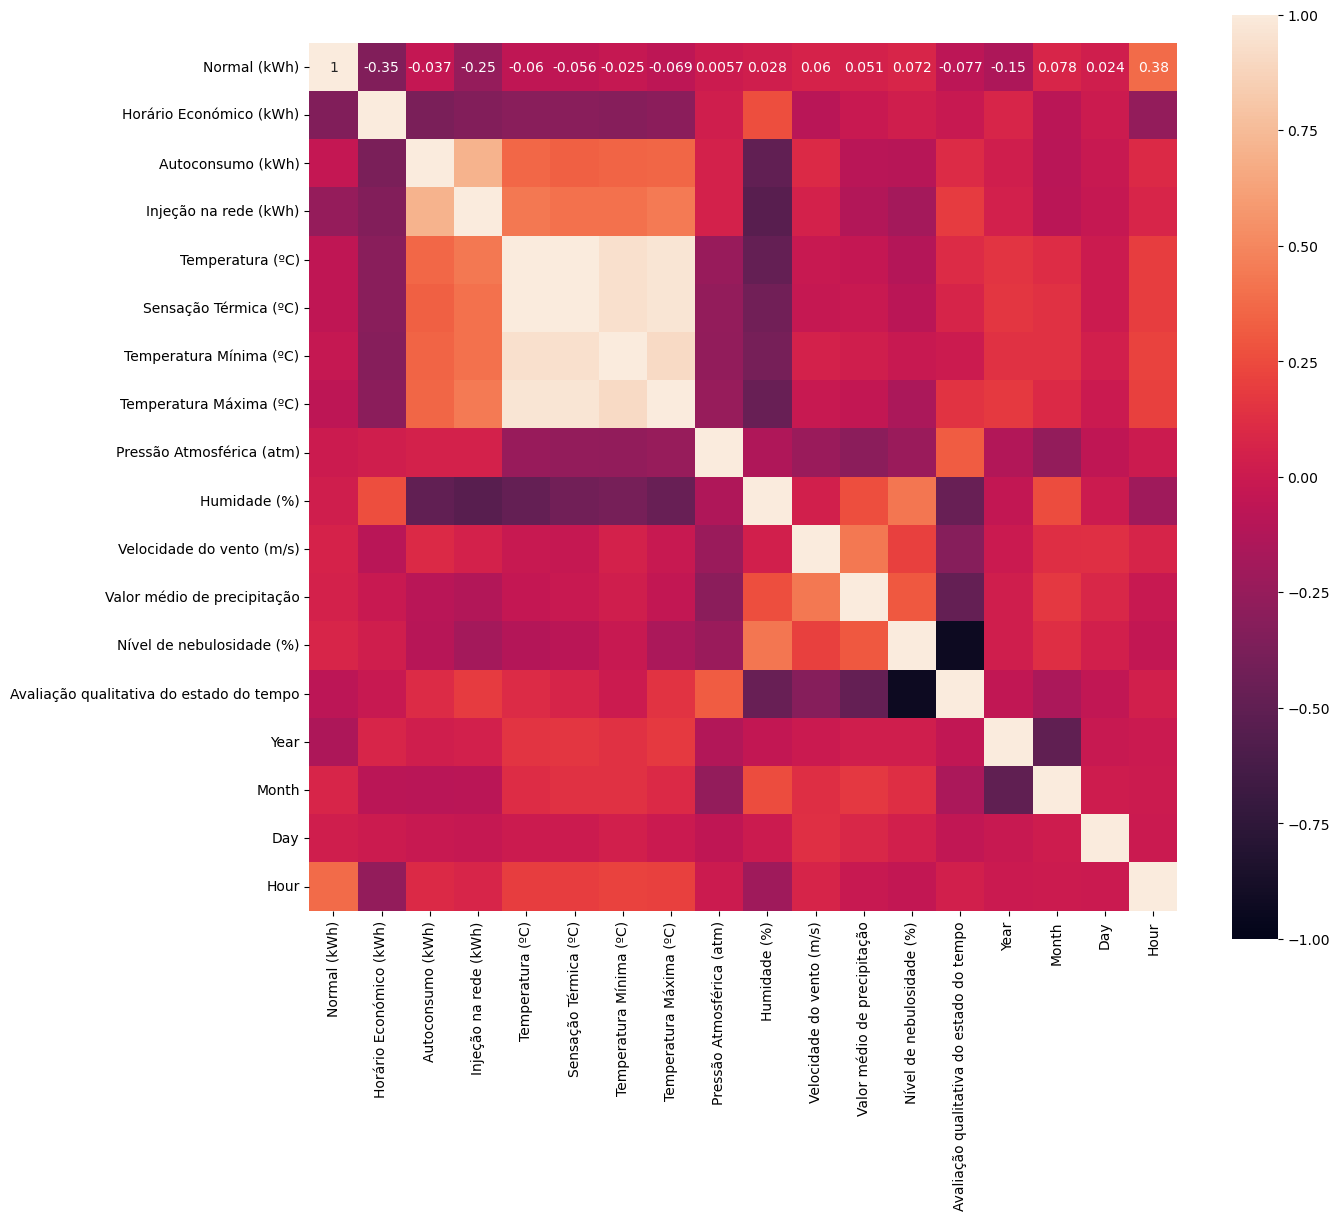

In [584]:
corr_matrix = data.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Modelação

In [585]:
X = data.drop(['Injeção na rede (kWh)', 'Velocidade do vento (m/s)', 'Sensação Térmica (ºC)', 'Temperatura Mínima (ºC)', 'Temperatura Máxima (ºC)', 'Avaliação qualitativa do estado do tempo'], axis=1)  
y = data['Injeção na rede (kWh)']

Undersampling

In [485]:
#undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
#X, y = undersample.fit_resample(X, y)

In [486]:
#print(y.value_counts())

In [487]:
X

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Temperatura (ºC),Pressão Atmosférica (atm),Humidade (%),Valor médio de precipitação,Nível de nebulosidade (%),Year,Month,Day,Hour
0,0.000,0.000,0.0,13.97,1027,81,0.00,87,2021,9,29,0
1,0.000,0.000,0.0,13.48,1028,82,0.00,91,2021,9,29,1
2,0.000,0.000,0.0,12.93,1027,84,0.00,93,2021,9,29,2
3,0.000,0.000,0.0,12.61,1027,85,0.00,95,2021,9,29,3
4,0.000,0.000,0.0,12.61,1027,86,0.00,93,2021,9,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1.693,0.000,0.0,15.70,1018,86,3.58,100,2022,12,31,19
11012,1.327,0.000,0.0,15.55,1018,87,4.20,100,2022,12,31,20
11013,0.757,0.000,0.0,13.45,1019,93,4.23,100,2022,12,31,21
11014,0.000,0.675,0.0,12.93,1019,94,3.90,100,2022,12,31,22


In [586]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11011    0
11012    0
11013    0
11014    0
11015    0
Name: Injeção na rede (kWh), Length: 10747, dtype: int64

### Oversampling e Undersampling

In [395]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [587]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [492]:
over = SMOTE()
under = RandomUnderSampler(sampling_strategy='auto')
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
# transform the dataset
#X_train, y_train = pipeline.fit_resample(X, y)

In [493]:
y_train.value_counts()

Injeção na rede (kWh)
0    7741
1    7741
2    7741
3    7741
4    7741
Name: count, dtype: int64

### Regressão Logística

### Training with newton-cg solver

In [494]:
starttime = time.process_time()

logmodel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logmodel1)
logmodel1.fit(X_train, y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 24.328125 seconds


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [495]:
predictions_newton = logmodel1.predict(X_test)

In [496]:
print(classification_report(y_test, predictions_newton))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2320
           1       0.31      0.75      0.44       140
           2       0.56      0.38      0.45       304
           3       0.55      0.47      0.51       295
           4       0.46      0.77      0.57       166

    accuracy                           0.81      3225
   macro avg       0.57      0.66      0.59      3225
weighted avg       0.86      0.81      0.83      3225



### Training with lbfgs solver

In [84]:
starttime = time.process_time()

logmodel2 = LogisticRegression(random_state=2022, solver='lbfgs')
print(logmodel2)
logmodel2.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022)
Time spent: 0.421875 seconds


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
predictions_solver = logmodel2.predict(X_test)

In [86]:
print(classification_report(y_test, predictions_solver))

              precision    recall  f1-score   support

           0       0.45      0.69      0.55      2286
           1       0.30      0.25      0.27      2359
           2       0.30      0.11      0.16      2420
           3       0.34      0.29      0.31      2290
           4       0.45      0.67      0.54      2257

    accuracy                           0.40     11612
   macro avg       0.37      0.40      0.37     11612
weighted avg       0.37      0.40      0.36     11612



### Training with liblinear solver



In [378]:
starttime = time.process_time()

logmodel3 = LogisticRegression(random_state=2022, solver='liblinear')
print(logmodel3)
logmodel3.fit(X_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

LogisticRegression(random_state=2022, solver='liblinear')
Time spent: 0.515625 seconds


In [379]:
predictions_liblinear = logmodel3.predict(X_test)

In [380]:
print(classification_report(y_test, predictions_solver))

ValueError: Found input variables with inconsistent numbers of samples: [3225, 11612]

### SVM (Support Vector Machine) 

In [276]:
model = SVC(random_state=2021)

In [91]:
model.fit(X_train, np.ravel(y_train))

SVC(random_state=2021)

In [92]:
pred_svm = model.predict(X_test)

In [93]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.39      0.68      0.50      2286
           1       0.23      0.24      0.24      2359
           2       0.23      0.02      0.03      2420
           3       0.23      0.02      0.04      2290
           4       0.34      0.71      0.46      2257

    accuracy                           0.33     11612
   macro avg       0.28      0.33      0.25     11612
weighted avg       0.28      0.33      0.25     11612



### xgboost

In [513]:
# 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.7
model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, seed=42,colsample_bytree=1, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.7)

In [514]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [515]:
predict_xgb = model.predict(X_test)

In [516]:
print(classification_report(y_test, predict_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2320
           1       0.95      1.00      0.97       140
           2       0.98      0.95      0.96       304
           3       0.96      0.96      0.96       295
           4       0.96      0.98      0.97       166

    accuracy                           0.99      3225
   macro avg       0.97      0.98      0.97      3225
weighted avg       0.99      0.99      0.99      3225



xgfboost fine tunning

In [588]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, seed=42)

In [593]:
param_grid = {
    'max_depth': [5, 7],  # Profundidade máxima de cada árvore
    'min_child_weight': [1, 3],  # Soma mínima dos pesos das instâncias necessária em um filho
    'subsample': [0.6, 0.8],  # Fração de amostras a serem usadas para cada árvore
    'colsample_bytree': [0.6, 0.8],  # Fração de colunas a serem usadas para cada árvore
    'learning_rate': [0.01, 0.1, 0.2],  # Taxa de aprendizagem
    'n_estimators': [100, 200],  # Número de árvores de impulso
    'seed': [42]  # Semente para reprodutibilidade
}


In [595]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy',verbose=4)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, seed=42, subsample=0.6;, score=0.882 total time=   0.3s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, seed=42, subsample=0.6;, score=0.872 total time=   0.2s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, seed=42, subsample=0.6;, score=0.866 total time=   0.2s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, seed=42, subsample=0.8;, score=0.878 total time=   0.2s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, seed=42, subsample=0.8;, score=0.873 total time=   0.2s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, seed=42, subsample=0.8

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=5,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [5, 7],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'seed': [42], 'subsample': [0.6, 0.8]},
             scoring='accuracy', verbose=4)

In [596]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'seed': 42, 'subsample': 0.8}
Best Score: 0.8816796754308562


In [506]:
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [507]:
y_pred = best_xgb_model.predict(X_test)

In [508]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2320
           1       0.93      1.00      0.96       140
           2       0.98      0.97      0.98       304
           3       0.96      0.99      0.97       295
           4       0.99      0.98      0.98       166

    accuracy                           0.99      3225
   macro avg       0.97      0.99      0.98      3225
weighted avg       0.99      0.99      0.99      3225



Decision Tree

In [220]:
dt_model = DecisionTreeClassifier(random_state=2021)

In [221]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [222]:
decision_tree_predictions = dt_model.predict(X_test)

In [223]:
print(classification_report(y_test, decision_tree_predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2320
           1       0.38      0.43      0.41       140
           2       0.53      0.51      0.52       304
           3       0.61      0.64      0.62       295
           4       0.72      0.71      0.72       166

    accuracy                           0.86      3225
   macro avg       0.64      0.65      0.65      3225
weighted avg       0.86      0.86      0.86      3225



In [224]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}
estimator_dt = DecisionTreeClassifier(random_state=2021)
grid_dt = GridSearchCV(estimator_dt, param_grid, refit=True, verbose=True)

grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=True)

In [225]:
grid_dt_predictions = grid_dt.predict(X_test)

In [226]:
print(classification_report(y_test, grid_dt_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2320
           1       0.43      0.18      0.25       140
           2       0.54      0.70      0.61       304
           3       0.55      0.68      0.61       295
           4       0.78      0.37      0.50       166

    accuracy                           0.86      3225
   macro avg       0.65      0.58      0.59      3225
weighted avg       0.86      0.86      0.85      3225



### Random Forest

In [227]:
#param_grid = {
#    'n_estimators': [100, 200],
#    'max_depth': [4,5,6,7,8,9,10],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

In [228]:
#grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
#                           param_grid=param_grid,
#                           cv=5,
#                           scoring='accuracy',
#                           n_jobs=-1)

In [229]:
#grid_search.fit(X_train, y_train)

In [230]:
#best_rf = grid_search.best_estimator_

In [231]:
#best_rf_predictions = best_rf.predict(X_test)

In [232]:
#print(classification_report(y_test, best_rf_predictions))

MLP

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)
X_train

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Temperatura (ºC),Pressão Atmosférica (atm),Humidade (%),Valor médio de precipitação,Nível de nebulosidade (%),Year,Month,Day,Hour
10581,0.000000,0.037976,0.000000,0.397216,0.475,0.9125,0.451007,1.00,1.0,1.000000,0.800000,0.086957
2266,0.152568,0.000000,0.457215,0.448041,0.750,0.5500,0.000000,0.93,1.0,0.000000,0.000000,0.434783
185,0.105814,0.000000,0.214765,0.749433,0.700,0.5125,0.000000,0.00,0.0,0.818182,0.166667,0.739130
3008,0.000000,0.000000,0.260067,0.395921,0.975,0.2875,0.000000,0.00,1.0,0.090909,0.000000,0.478261
1875,0.000000,0.043136,0.000000,0.211072,0.750,0.7375,0.000000,0.01,0.0,1.000000,0.500000,0.130435
...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.173177,0.000000,0.000000,0.388152,0.725,0.8125,0.000000,0.00,0.0,0.818182,0.733333,1.000000
5695,0.029529,0.000000,0.354027,0.505018,0.600,0.5625,0.000000,0.50,1.0,0.363636,0.766667,0.652174
8006,0.000000,0.043422,0.000000,0.497896,0.550,0.9250,0.016107,1.00,1.0,0.727273,0.233333,0.304348
1361,0.158720,0.000000,0.000000,0.340240,0.550,0.6750,0.000000,0.22,0.0,0.909091,0.766667,0.739130


In [234]:
"""def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    neurons = neurons / 2
    while neurons > 1:
        model.add(Dense(neurons, activation=activation))
        neurons = neurons / 2
    model.add(Dense(1, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model"""

In [83]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(128, input_dim=X_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # Output layer - 4 classes

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [84]:
model = build_model()

In [102]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [104]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, 
                    batch_size=10, verbose=2, callbacks=[early_stopping])

Epoch 1/100
602/602 - 1s - loss: 0.7272 - accuracy: 0.7371 - val_loss: 0.4608 - val_accuracy: 0.8093 - 935ms/epoch - 2ms/step
Epoch 2/100
602/602 - 0s - loss: 0.4896 - accuracy: 0.7992 - val_loss: 0.4191 - val_accuracy: 0.8239 - 475ms/epoch - 789us/step
Epoch 3/100
602/602 - 0s - loss: 0.4633 - accuracy: 0.8095 - val_loss: 0.4020 - val_accuracy: 0.8279 - 468ms/epoch - 777us/step
Epoch 4/100
602/602 - 0s - loss: 0.4369 - accuracy: 0.8124 - val_loss: 0.3770 - val_accuracy: 0.8339 - 470ms/epoch - 781us/step
Epoch 5/100
602/602 - 0s - loss: 0.4234 - accuracy: 0.8169 - val_loss: 0.3697 - val_accuracy: 0.8405 - 470ms/epoch - 780us/step
Epoch 6/100
602/602 - 0s - loss: 0.4183 - accuracy: 0.8172 - val_loss: 0.3685 - val_accuracy: 0.8372 - 469ms/epoch - 780us/step
Epoch 7/100
602/602 - 0s - loss: 0.4116 - accuracy: 0.8227 - val_loss: 0.3505 - val_accuracy: 0.8439 - 475ms/epoch - 789us/step
Epoch 8/100
602/602 - 0s - loss: 0.4088 - accuracy: 0.8210 - val_loss: 0.3464 - val_accuracy: 0.8525 - 471

In [105]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy*100:.2f}%")

101/101 - 0s - loss: 0.3252 - accuracy: 0.8682 - 67ms/epoch - 659us/step
Test Accuracy: 86.82%


In [109]:
y_pred_prob = model.predict(X_test)

101/101 [==============================] - 0s 550us/step


In [111]:
y_pred = y_pred_prob.argmax(axis=1)
y_pred

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2320
           1       0.53      0.06      0.11       140
           2       0.51      0.64      0.57       304
           3       0.59      0.74      0.66       295
           4       0.84      0.69      0.76       166

    accuracy                           0.87      3225
   macro avg       0.69      0.62      0.62      3225
weighted avg       0.87      0.87      0.86      3225



Grid Search

In [106]:
kf = KFold(n_splits=5, shuffle=True, random_state=2021)

In [107]:
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop', 'adagrad', 'nadam'],
    #'activation': ['relu', 'sigmoid', 'tanh', 'softmax', 'elu', 'leaky_relu'],
}

In [124]:
model = KerasClassifier(build_fn=build_model, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

In [118]:
model.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

In [125]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy',refit=True, verbose=3)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ....................optimizer=adam;, score=0.866 total time=  15.6s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ....................optimizer=adam;, score=0.844 total time=  15.3s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ....................optimizer=adam;, score=0.860 total time=  15.2s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ....................optimizer=adam;, score=0.864 total time=  15.2s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ....................optimizer=adam;, score=0.872 total time=  15.2s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .....................optimizer=sgd;, score=0.873 total time=  15.2s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .....................optimizer=sgd;, score=0.851 total time=  15.2s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .....................optimizer=sgd;, score=0.866 total time=  16.3s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .....................optimizer=sgd;, score=0.866 total time=  15.8s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .....................optimizer=sgd;, score=0.870 total time=  15.5s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .................optimizer=rmsprop;, score=0.868 total time=  15.6s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .................optimizer=rmsprop;, score=0.849 total time=  15.5s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .................optimizer=rmsprop;, score=0.870 total time=  15.5s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .................optimizer=rmsprop;, score=0.871 total time=  15.4s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .................optimizer=rmsprop;, score=0.876 total time=  15.4s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END .................optimizer=adagrad;, score=0.873 total time=  15.5s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END .................optimizer=adagrad;, score=0.852 total time=  15.4s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END .................optimizer=adagrad;, score=0.868 total time=  15.5s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END .................optimizer=adagrad;, score=0.860 total time=  15.6s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END .................optimizer=adagrad;, score=0.873 total time=  15.5s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5] END ...................optimizer=nadam;, score=0.868 total time=  15.5s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5] END ...................optimizer=nadam;, score=0.845 total time=  15.6s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5] END ...................optimizer=nadam;, score=0.862 total time=  15.8s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5] END ...................optimizer=nadam;, score=0.872 total time=  15.5s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5] END ...................optimizer=nadam;, score=0.868 total time=  15.4s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [126]:
best_model = grid_result.best_estimator_
best_model

KerasClassifier(
	model=None
	build_fn=<function build_model at 0x0000027DCD1C8430>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)

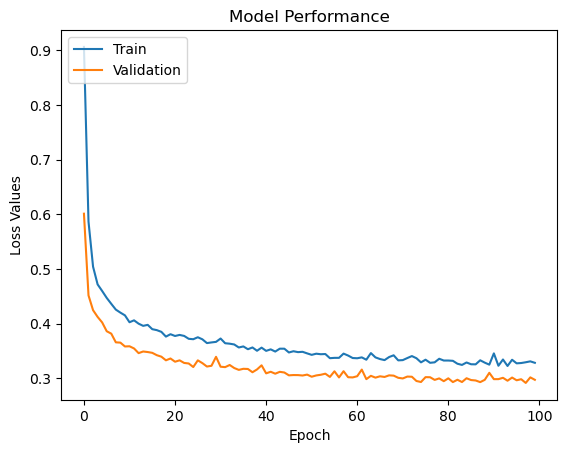

In [127]:
plt.plot(best_model.history_['loss'])
plt.plot(best_model.history_['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss Values')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [128]:
mlp_pred = best_model.predict(X_test)

In [129]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2320
           1       0.42      0.27      0.33       140
           2       0.54      0.69      0.60       304
           3       0.62      0.57      0.60       295
           4       0.74      0.73      0.74       166

    accuracy                           0.87      3225
   macro avg       0.66      0.65      0.65      3225
weighted avg       0.87      0.87      0.86      3225

